# CNN POKEMON 

`Amy EBEN SANG KOTTA`


In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

2024-10-08 14:39:54.365005: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Dossier des données d'entraînement et de test

In [2]:
train_dir = './dataCNN/PokemonTrainData/'
test_dir = './dataCNN/PokemonTestData/'

### Affichage des images 

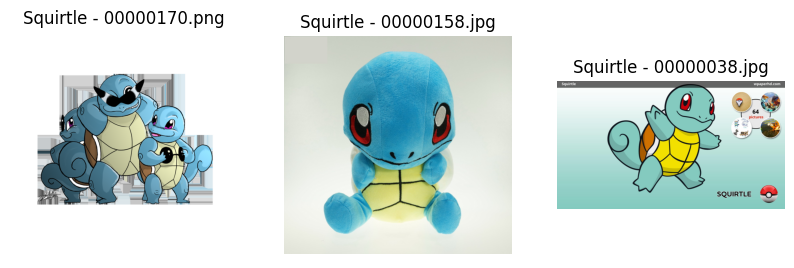

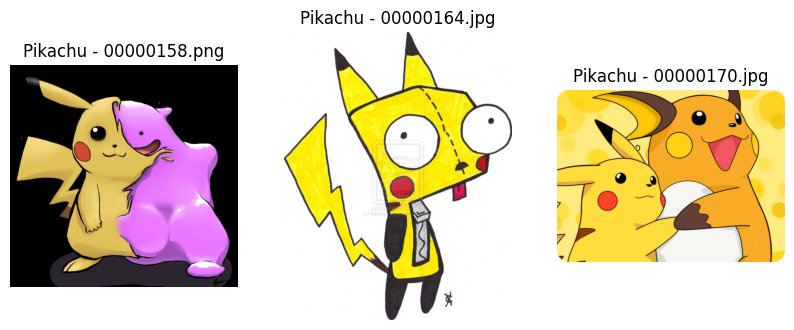

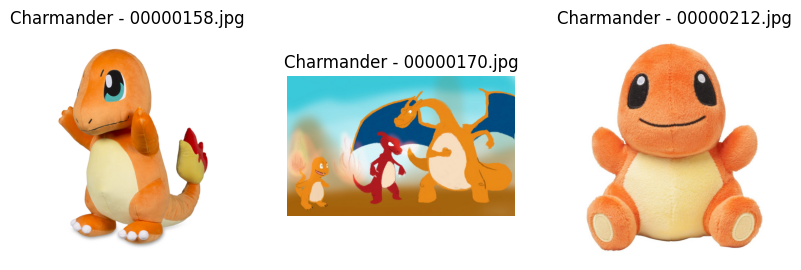

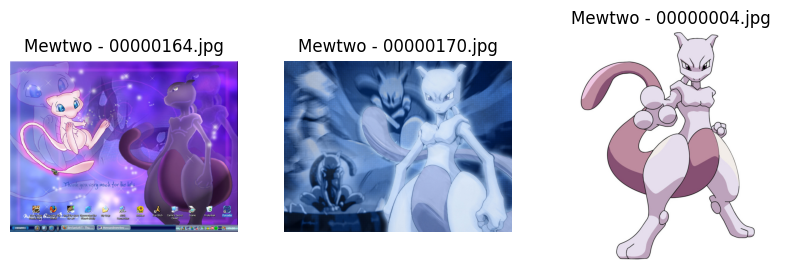

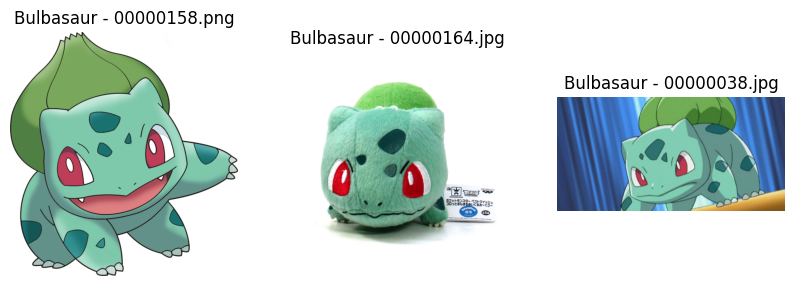

In [3]:
# Parcourir chaque sous-dossier (chaque catégorie de Pokémon)
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)

    # Vérifier que c'est bien un dossier et non un fichier
    if os.path.isdir(folder_path):
        # Récupérer les fichiers images dans chaque sous-dossier
        image_files = os.listdir(folder_path)

        # Limiter l'affichage à 3 images par dossier pour éviter de surcharger
        plt.figure(figsize=(10, 10))
        for i, image_file in enumerate(image_files[:3]):  # Limiter à 3 images
            img_path = os.path.join(folder_path, image_file)

            # Charger et afficher l'image
            img = load_img(img_path)
            plt.subplot(1, 3, i + 1)
            plt.imshow(img)
            plt.title(f'{folder} - {image_file}')
            plt.axis('off')

        # Afficher les images de chaque catégorie (Pokémon)
        plt.show()

### Créer un générateur d'images avec des transformations et une normalisation

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Normaliser les images (0-255 -> 0-1)
    validation_split=0.2  # 20% des images pour la validation
)

Dans ImageDataGenerator, le paramètre class_mode='categorical' signifie que les étiquettes pour chaque image seront converties en one-hot encoding.
One-hot encoding transforme chaque classe (Pokémon) en un vecteur binaire. Par exemple, si tu as 5 classes (Pokémon), l'étiquette pour une image de Bulbasaur ressemblera à [1, 0, 0, 0, 0], tandis que pour Squirtle, cela pourrait être [0, 0, 0, 0, 1].
Voici un exemple pour 5 classes :
Classe	One-hot encoding
Bulbasaur	[1, 0, 0, 0, 0]
Charmander	[0, 1, 0, 0, 0]
Mewtwo	[0, 0, 1, 0, 0]
Pikachu	[0, 0, 0, 1, 0]
Squirtle	[0, 0, 0, 0, 1]


### Charger les images d'entraînement et de validation

In [5]:
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Taille des images
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Pour l'entraînement
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Pour la validation
)

Found 872 images belonging to 5 classes.
Found 216 images belonging to 5 classes.


### Préparer les données de test

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 233 images belonging to 5 classes.


### Construction du modèle CNN 

Le modèle CNN sera constitué de trois couches Conv2D suivies de couches de MaxPooling2D, puis de couches Flatten et Dense.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Construction du modèle CNN
model = Sequential()

# Première couche de convolution et pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Deuxième couche de convolution et pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Troisième couche de convolution et pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatissement des sorties des couches convolutionnelles
model.add(Flatten())

# Couche Dense complètement connectée
model.add(Dense(128, activation='relu'))

# Couche de sortie pour la classification des classes (Pokémons)
model.add(Dense(train_data.num_classes, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

### Entraînement du modèle :

Le modèle est maintenant prêt à être entraîné. Nous utiliserons les données d'entraînement et de validation préparées auparavant.

In [8]:
# Entraîner le modèle
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Nombre d'époques
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)

Epoch 1/10
 9/27 [=========>....................] - ETA: 18s - loss: 1.8717 - accuracy: 0.2118

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 [==============================] - 36s 1s/step - loss: 1.3663 - accuracy: 0.4179 - val_loss: 0.5606 - val_accuracy: 0.7865
Epoch 2/10
27/27 [==============================] - 33s 1s/step - loss: 0.7051 - accuracy: 0.7190 - val_loss: 0.3444 - val_accuracy: 0.9323
Epoch 3/10
27/27 [==============================] - 34s 1s/step - loss: 0.4499 - accuracy: 0.8381 - val_loss: 0.2813 - val_accuracy: 0.9062
Epoch 4/10
27/27 [==============================] - 35s 1s/step - loss: 0.2881 - accuracy: 0.9000 - val_loss: 0.2465 - val_accuracy: 0.9219
Epoch 5/10
27/27 [==============================] - 34s 1s/step - loss: 0.2063 - accuracy: 0.9417 - val_loss: 0.1863 - val_accuracy: 0.9531
Epoch 6/10
27/27 [==============================] - 34s 1s/step - loss: 0.2202 - accuracy: 0.9143 - val_loss: 0.3442 - val_accuracy: 0.8594
Epoch 7/10
27/27 [==============================] - 34s 1s/step - loss: 0.1433 - accuracy: 0.9560 - val_loss: 0.1539 - val_accuracy: 0.9635
Epoch 8/10
27/27 [=============

### Test du modèle et calcule des métriques (rappel, précision, F-mesure) :

Pour évaluer les performances du modèle sur les données de test, nous allons calculer la précision, le rappel et la F-mesure en utilisant sklearn.

8/8 [==============================] - 5s 589ms/step
              precision    recall  f1-score   support

   Bulbasaur       0.11      0.11      0.11        36
  Charmander       0.11      0.13      0.12        46
      Mewtwo       0.11      0.11      0.11        47
     Pikachu       0.31      0.26      0.28        57
    Squirtle       0.27      0.26      0.26        47

    accuracy                           0.18       233
   macro avg       0.18      0.17      0.18       233
weighted avg       0.19      0.18      0.18       233

[[ 4 11  8  7  6]
 [ 7  6 15 11  7]
 [ 9 12  5  8 13]
 [ 6 16 13 15  7]
 [10 11  6  8 12]]


### Afficher les courbes d'entraînement :

Tu peux aussi visualiser les performances d'entraînement pour mieux comprendre comment ton modèle s'améliore.

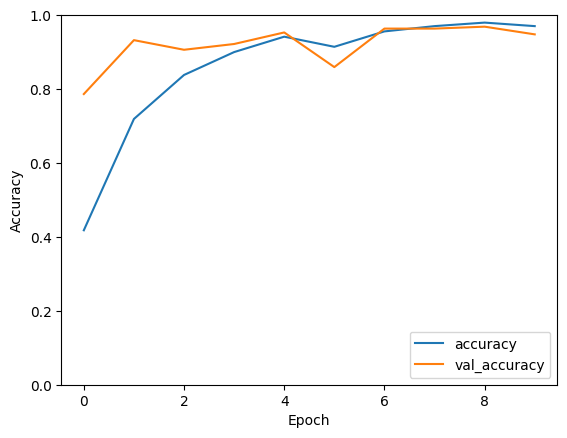

In [10]:
# Afficher la courbe d'apprentissage
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


8/8 [==============================] - 5s 625ms/step - loss: 0.1353 - accuracy: 0.9399
Test Loss: 0.1353
Test Accuracy: 0.9399
